# SMS Spam Detection

## Importing Data 

In [1]:
import numpy as np
import pandas as pd

In [2]:
import pandas as pd

# List of possible encodings to try
encodings = ['Utf-8','latin1','ISO-8859-1',' cpi252 ']
file_path = 'spam.csv'  # Change this to the path of your CSV file
# Attempt to read the CSV file with different encodings
for encoding in encodings:
    try:
        df = pd.read_csv(file_path, encoding=encoding)
        print(f"Fi1e successfully read with encoding: {encoding}" )
        break # Stop the Loop if successful
    except UnicodeDecodeError:
        print(f"Fai1ed to read with encoding: {encoding}" )
        continue # Try
# If the Loop completes without success, df will not be defined
if 'df' in locals():
    print("CSV file has been successfully loaded.")
else :
    print("All encoding attempts failed. unable to read the CSV file.")

Fai1ed to read with encoding: Utf-8
Fi1e successfully read with encoding: latin1
CSV file has been successfully loaded.


In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1347,ham,She doesnt need any test.,NaN,NaN,NaN
2695,ham,And whenever you and i see we can still hook u...,NaN,NaN,NaN
1682,ham,HI BABE U R MOST LIKELY TO BE IN BED BUT IM SO...,NaN,NaN,NaN
5295,ham,Alex says he's not ok with you not being ok wi...,NaN,NaN,NaN
5464,ham,I will treasure every moment we spend together...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

## Steps involved 

*1. Data cleaning*

*2. EDA*

*3. Data Preprocessing*

*4. Model building*

*5. Evaluation*

*6. Improvement*

*7. Website*

*8. Deploy*

## 1.Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
#drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.sample(5)

,v1,v2
5553,ham,Hahaha..use your brain dear
4687,ham,Hmmm.but you should give it on one day..
1735,ham,Why tired what special there you had
699,ham,K..u also dont msg or reply to his msg..
3653,ham,Why i come in between you people


In [8]:
#Renaming The columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [9]:
df.sample(5)

,target,text
2720,ham,Ok lor...
1793,ham,You bad girl. I can still remember them
937,ham,K:)k.are you in college?
5398,ham,Hi. Hope you had a good day. Have a better night.
2380,ham,"If i let you do this, i want you in the house ..."


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [11]:
df['target']=encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
#missing values
print(df.isnull().sum())

target    0
text      0
dtype: int64


In [14]:
#check for dupicates
print(df.duplicated().sum())

403


In [15]:
#remove duplicates
df = df.drop_duplicates(keep='first')

In [16]:
#check for dupicates
print(df.duplicated().sum())

0


In [17]:
df.shape

(5169, 2)

## 2.Exploratory Data Analysis

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
print(df['target'].value_counts())

0    4516
1     653
Name: target, dtype: int64


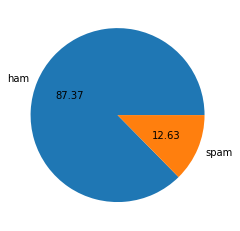

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=["ham","spam"],autopct='%0.2f')
plt.show()

##### Big chunk of ham and very little spam so our data is imbalanced

In [21]:
import nltk

In [22]:
#installing nltk module
%pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: C:\Users\Shreyas\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip


In [23]:
import nltk

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shreyas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
#number of charecters
df['num_charecters'] = df['text'].apply(len) 

In [26]:
df.head()

,target,text,num_charecters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
#number of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x))) 

In [28]:
df.head()

,target,text,num_charecters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
#number of sentances
df['num_sentances'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [30]:
df.head()

,target,text,num_charecters,num_words,num_sentances
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
df[['num_charecters','num_words','num_sentances']].describe()

,num_charecters,num_words,num_sentances
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
#target ham
df[df['target']==0][['num_charecters','num_words','num_sentances']].describe()

,num_charecters,num_words,num_sentances
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
#target spam
df[df['target']==1][['num_charecters','num_words','num_sentances']].describe()

,num_charecters,num_words,num_sentances
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


##### Graphical Representation of data 


In [34]:
import seaborn as sb

<AxesSubplot:xlabel='num_charecters', ylabel='Count'>

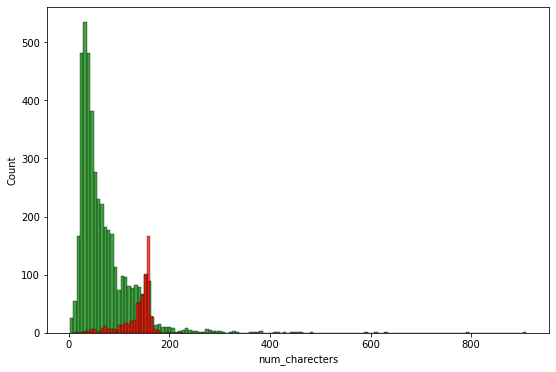

In [35]:
plt.figure(figsize=(9,6))
sb.histplot(df[df['target']==0]['num_charecters'],color='green')
sb.histplot(df[df['target']==1]['num_charecters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

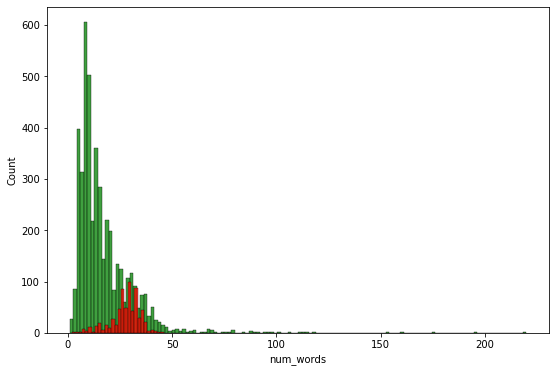

In [36]:
plt.figure(figsize=(9,6))
sb.histplot(df[df['target']==0]['num_words'],color='green')
sb.histplot(df[df['target']==1]['num_words'],color='red')

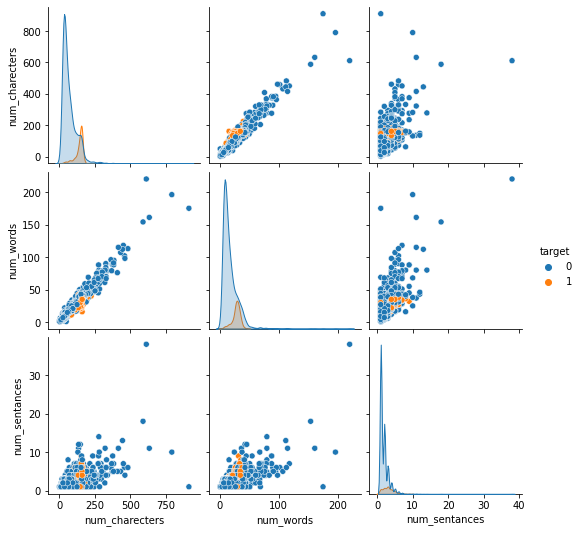

In [37]:
sb.pairplot(df,hue='target')

<AxesSubplot:>

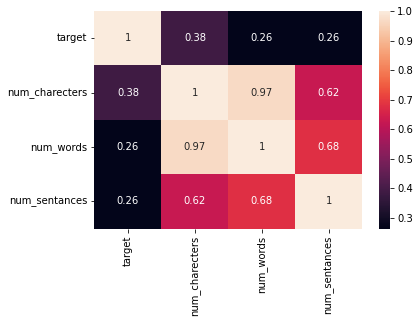

In [38]:
sb.heatmap(df.corr(),annot=True)

## 3.Text Preprocessing

~ *Lower case*

~ *Tokenization*

~ *Removing special characters*

~ *Removing stop words and punctuation*

~ *Stemming*

In [39]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

nltk.download('stopwords') #downloading stopwords dataset

ps = PorterStemmer()

def transform(text):

    #convert words to lower case and tokenize the text
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    #removing special charecters by selection only aplhanumeric words
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    #Removing stopwords and puntuation marks 
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    #stemming the words
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)    


print(transform('I HAVE A DATE ON SUNDAY WITH WILL!!'))
    
    

date sunday


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shreyas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
df['text'][14]

'I HAVE A DATE ON SUNDAY WITH WILL!!'

In [41]:
#working of stemmer
from nltk.stem import PorterStemmer
ps=PorterStemmer()
ps.stem("rolling")

'roll'

In [42]:
#transforming the text 
df['transformed_text']=df['text'].apply(transform)
df.head()

,target,text,num_charecters,num_words,num_sentances,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [43]:
#installing wordcloud module
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: C:\Users\Shreyas\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip


In [44]:
#importing wordcloud and setting WordCloud object with the following parameters
from wordcloud import WordCloud
wc= WordCloud(width=600,height=600,min_font_size=10,background_color='white')

In [45]:
#selecting spam words
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=' '))

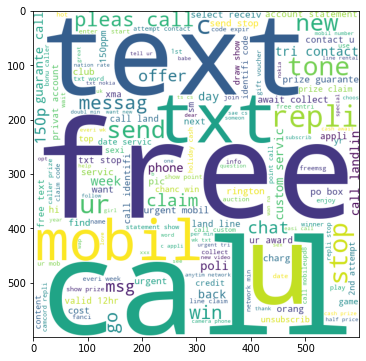

In [46]:
#plotting word cloud for spam words
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [47]:
#selecting ham words
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=' '))

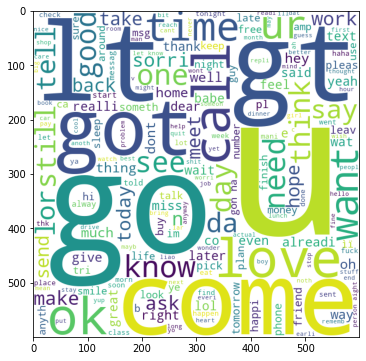

In [48]:
#plotting word cloud for ham words
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [49]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

print(len(spam_corpus))        

9939


C:\Users\Shreyas\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


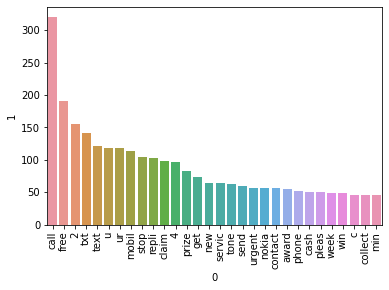

In [50]:
from collections import Counter
sb.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [51]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
        
len(ham_corpus)        

35404

C:\Users\Shreyas\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


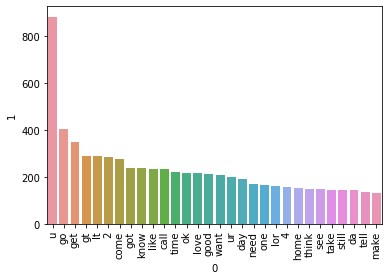

In [52]:
sb.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## 4. Model building


In [53]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [54]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [55]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#x = scaler.fit_transform(x)

In [56]:
# appending the num_character col to x
#x = np.hstack((x,df['num_characters '].values.reshape(-1,1))

In [57]:
x.shape

(5169, 3000)

In [58]:
y= df['target'].values

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [61]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score

In [62]:
gnb= GaussianNB()
mnb= MultinomialNB()
bnb= BernoulliNB()

In [63]:
gnb.fit(x_train,y_train)
y_pred1= gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [64]:
mnb.fit(x_train,y_train)
y_pred2= mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [65]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [66]:
#tfidf -->MNB

In [67]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: C:\Users\Shreyas\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip


In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [69]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [70]:
clfs = {
    'SVC': svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'Bgc': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'XGB': xgb
}

In [71]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    
    return accuracy,precision

In [72]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [73]:
accuracy_scores = []
precision_scores = [] 

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf,x_train,y_train,x_test,y_test)
    
    print('for ',name)
    print('accuracy-',current_accuracy)
    print('precision-',current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

for  SVC
accuracy- 0.9758220502901354
precision- 0.9747899159663865


C:\Users\Shreyas\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


for  KN
accuracy- 0.9052224371373307
precision- 1.0
for  NB
accuracy- 0.9709864603481625
precision- 1.0
for  DT
accuracy- 0.9294003868471954
precision- 0.8282828282828283
for  LR
accuracy- 0.9584139264990329
precision- 0.9702970297029703
for  RF
accuracy- 0.9758220502901354
precision- 0.9829059829059829
for  AdaBoost
accuracy- 0.960348162475822
precision- 0.9292035398230089
for  Bgc
accuracy- 0.9584139264990329
precision- 0.8682170542635659
for  ETC
accuracy- 0.9748549323017408
precision- 0.9745762711864406
for  GBDT
accuracy- 0.9468085106382979
precision- 0.9191919191919192
for  XGB
accuracy- 0.9671179883945842
precision- 0.9333333333333333


In [74]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [75]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,XGB,0.967118,0.933333
6,AdaBoost,0.960348,0.929204
9,GBDT,0.946809,0.919192
7,Bgc,0.958414,0.868217


In [76]:
performance_df1=pd.melt(performance_df,id_vars='Algorithm')

In [77]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,XGB,Accuracy,0.967118
7,AdaBoost,Accuracy,0.960348
8,GBDT,Accuracy,0.946809
9,Bgc,Accuracy,0.958414


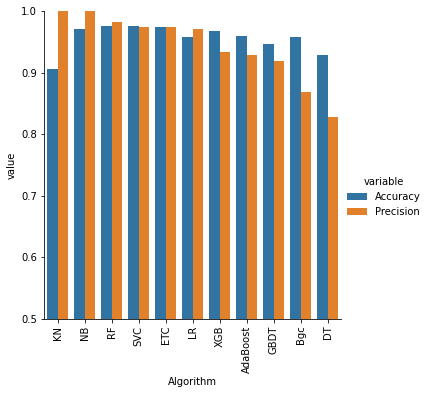

In [78]:
sb.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1,kind='bar', height=5)

plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [79]:
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_300': accuracy_scores,'Precision_max_ft_3000': precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [80]:
new_df=performance_df.merge(temp_df,on='Algorithm')

In [81]:
new_df_scaled=new_df.merge(temp_df,on='Algorithm')

In [82]:
temp_df=pd.DataFrame({'Algorithm': clfs.keys(),'accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [83]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_300_x,Precision_max_ft_3000_x,Accuracy_max_ft_300_y,Precision_max_ft_3000_y,accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,XGB,0.967118,0.933333,0.967118,0.933333,0.967118,0.933333,0.967118,0.933333
7,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
8,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
9,Bgc,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217


In [84]:
#voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)

In [85]:
from sklearn.ensemble import VotingClassifier

In [86]:
voting=VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [87]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [88]:
y_pred = voting.predict(x_test)
print ("Accuracy",accuracy_score(y_test, y_pred ))
print ("Precision",precision_score(y_test, y_pred) )

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [89]:
#applying stacking
estimators=[('svm',svc),('nb',mnb),('et',etc)]
final_estimator=RandomForestClassifier()

In [90]:
from sklearn.ensemble import StackingClassifier

In [91]:
clf=StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [92]:
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy",accuracy_score (y_test,y_pred))
print("precision",precision_score (y_test,y_pred))

Accuracy 0.9806576402321083
precision 0.946969696969697


In [95]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [96]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

#sample test data and corresponding lables
x_train=['Sample text 1','Sample text 2','Sample text3']
y_train=[0, 1, 0]#exaple lables(0 for negetive,1 for positive)

#create and trin the TF-IDF Vectorizer
tfidf=TfidfVectorizer(lowercase=True,stop_words='english')
x_train_tfidf=tfidf.fit_transform(x_train)

#create and trin the Naive Bayes Classifier
mnb=MultinomialNB()
mnb.fit(x_train_tfidf,y_train)

#save the trained TF-IDF Vectorizer and Naive Bayes Classifier to files
with open('vectorizer.pkl','wb')as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)
    
with open('model.pkl','wb')as model_file:
    pickle.dump(mnb, model_file)

In [99]:
!pip install streamlit

  Using cached streamlit-1.31.1-py2.py3-none-any.whl (8.4 MB)
  Using cached altair-5.2.0-py3-none-any.whl (996 kB)
  Using cached blinker-1.7.0-py3-none-any.whl (13 kB)
  Using cached cachetools-5.3.3-py3-none-any.whl (9.3 kB)
  Using cached importlib_metadata-7.0.2-py3-none-any.whl (24 kB)
  Using cached pandas-2.2.1-cp311-cp311-win_amd64.whl (11.6 MB)
  Using cached pyarrow-15.0.0-cp311-cp311-win_amd64.whl (24.8 MB)
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Using cached rich-13.7.1-py3-none-any.whl (240 kB)
  Using cached GitPython-3.1.42-py3-none-any.whl (195 kB)
  Using cached pydeck-0.8.1b0-py2.py3-none-any.whl (4.8 MB)
  Using cached Jinja2-3.1.3-py3-none-any.whl (133 kB)
  Using cached jsonschema-4.21.1-py3-none-any.whl (85 kB)
  Using cached gitdb-4.0.11-py3-none-any.whl (62 kB)
  Using cached charset_normalizer-3.3.2-cp311-cp311-win_amd64.whl (99 kB)
  Using cached idna-3.6-py3-none-any.whl (61 kB)
  Using cached certifi-2024.2.2-py3-none-any.whl (163 kB)
  Us

ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'C:\\Python311\\Scripts\\normalizer.exe' -> 'C:\\Python311\\Scripts\\normalizer.exe.deleteme'


[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [103]:
!pip install streamlit

  Using cached streamlit-1.31.1-py2.py3-none-any.whl (8.4 MB)
  Using cached altair-5.2.0-py3-none-any.whl (996 kB)
  Using cached blinker-1.7.0-py3-none-any.whl (13 kB)
  Using cached cachetools-5.3.3-py3-none-any.whl (9.3 kB)
  Using cached pandas-2.2.1-cp311-cp311-win_amd64.whl (11.6 MB)
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Using cached rich-13.7.1-py3-none-any.whl (240 kB)
  Using cached GitPython-3.1.42-py3-none-any.whl (195 kB)
  Using cached pydeck-0.8.1b0-py2.py3-none-any.whl (4.8 MB)
  Using cached Jinja2-3.1.3-py3-none-any.whl (133 kB)
  Using cached jsonschema-4.21.1-py3-none-any.whl (85 kB)
  Using cached certifi-2024.2.2-py3-none-any.whl (163 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl (87 kB)
  Using cached attrs-23.2.0-py3-none-any.whl (60 kB)
  Using cached jsonschema_specifications-2023.12.1-py3-none-any.whl (18 kB)
  Using cached referencing-0.33.0-py3-none-any.whl (26 kB)


ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'C:\\Python311\\Scripts\\markdown-it.exe' -> 'C:\\Python311\\Scripts\\markdown-it.exe.deleteme'


[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip
